In [ ]:
from  google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords


In [ ]:
true_path = '/content/drive/MyDrive/News _dataset/True.csv'
fake_path = '/content/drive/MyDrive/News _dataset/Fake.csv'

df_true = pd.read_csv(true_path)
df_fake = pd.read_csv(fake_path)

df_true['label'] = 1  # True news = 1
df_fake['label'] = 0  # Fake news = 0

data = pd.concat([df_true, df_fake], ignore_index=True)


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove digits
    text = text.lower()                  # Lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['text'] = data['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os

# Create directory if it doesn't exist
os.makedirs('/content/drive/MyDrive/fake_news_model', exist_ok=True)

# Now save
joblib.dump(vectorizer, '/content/drive/MyDrive/fake_news_model/vectorizer.pkl')


['/content/drive/MyDrive/fake_news_model/vectorizer.pkl']

In [ ]:
X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Save vectorizer
joblib.dump(vectorizer, '/content/drive/MyDrive/fake_news_model/vectorizer.pkl')


['/content/drive/MyDrive/fake_news_model/vectorizer.pkl']

In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Save model
joblib.dump(model, '/content/drive/MyDrive/fake_news_model/nb_model.pkl')


['/content/drive/MyDrive/fake_news_model/nb_model.pkl']

In [ ]:
predictions = model.predict(X_test_vec)

print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4650
           1       0.94      0.94      0.94      4330

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [ ]:
import joblib

# Load vectorizer and model
vectorizer = joblib.load('/content/drive/MyDrive/fake_news_model/vectorizer.pkl')
model = joblib.load('/content/drive/MyDrive/fake_news_model/nb_model.pkl')


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Custom article to test
sample_news = [
    """Donald Trump just couldn’t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media...

    [FULL ARTICLE TEXT]

    Photo by Andrew Burton/Getty Images."""
]

# Clean and vectorize
cleaned_samples = [clean_text(news) for news in sample_news]
vectorized_samples = vectorizer.transform(cleaned_samples)

# Predict
predictions = model.predict(vectorized_samples)

# Output result
for text, label in zip(sample_news, predictions):
    print("\nNews Article:")
    print(text[:500], "..." if len(text) > 500 else "")  # Show first 500 characters
    print("Prediction:", "✅ Real" if label == 1 else "❌ Fake")




News Article:
Donald Trump just couldn’t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media...

    [FULL ARTICLE TEXT]
    
    Photo by Andrew Burton/Getty Images. 
Prediction: ❌ Fake


In [ ]:
# Custom article to test
sample_news = [
    """Donald Trump just couldn’t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media...

    [FULL ARTICLE TEXT]

    Photo by Andrew Burton/Getty Images."""
]

# Clean and vectorize
cleaned_samples = [clean_text(news) for news in sample_news]
vectorized_samples = vectorizer.transform(cleaned_samples)

# Predict
predictions = model.predict(vectorized_samples)

# Output result
for text, label in zip(sample_news, predictions):
    print("\nNews Article:")
    print(text[:500], "..." if len(text) > 500 else "")  # Show first 500 characters
    print("Prediction:", "✅ Real" if label == 1 else "❌ Fake")

In [ ]:
# Custom article to test
sample_news = [
    """WEST PALM BEACH, Fla (Reuters) - President Donald Trump said on Thursday he believes he will be fairly treated in a special counsel investigation into Russian meddling in the U.S. presidential election, but said he did not know how long the probe would last. The federal investigation has hung over Trump’s White House since he took office almost a year ago, and some Trump allies have in recent weeks accused the team of Justice Department Special Counsel Robert Mueller of being biased against the Republican president. But in an interview with the New York Times, Trump appeared to shrug off concerns about the investigation, which was prompted by U.S. intelligence agencies’ conclusion that Russia tried to help Trump defeat Democrat Hillary Clinton by hacking and releasing embarrassing emails and disseminating propaganda...

    [Rest of article text here if needed]
    """
]

# Clean and vectorize
cleaned_samples = [clean_text(news) for news in sample_news]
vectorized_samples = vectorizer.transform(cleaned_samples)

# Predict
predictions = model.predict(vectorized_samples)

# Output result
for text, label in zip(sample_news, predictions):
    print("\nNews Article:")
    print(text[:500], "..." if len(text) > 500 else "")  # Preview first 500 characters
    print("Prediction:", "✅ Real" if label == 1 else "❌ Fake")



News Article:
WEST PALM BEACH, Fla (Reuters) - President Donald Trump said on Thursday he believes he will be fairly treated in a special counsel investigation into Russian meddling in the U.S. presidential election, but said he did not know how long the probe would last. The federal investigation has hung over Trump’s White House since he took office almost a year ago, and some Trump allies have in recent weeks accused the team of Justice Department Special Counsel Robert Mueller of being biased against the  ...
Prediction: ✅ Real


Accuracy:  0.94
Precision: 0.94
Recall:    0.94
F1 Score:  0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4650
           1       0.94      0.94      0.94      4330

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



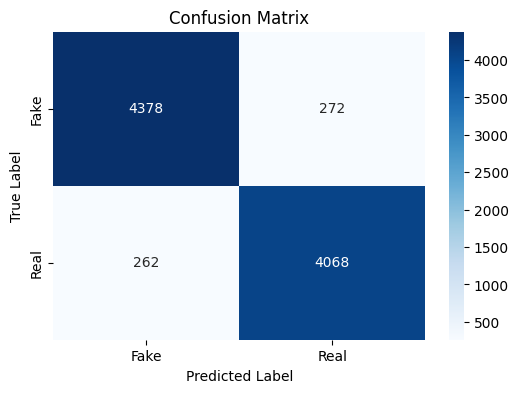

<ipython-input-16-7fe6b539ba3d>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


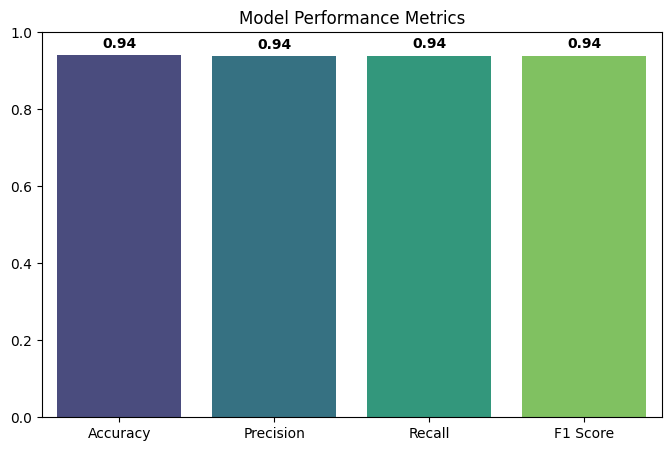

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict again to be sure
predictions = model.predict(X_test_vec)

# Accuracy, Precision, Recall, F1
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print Metrics
print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1 Score:  {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, predictions))

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 📈 Bar Graphs of Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [acc, prec, rec, f1]

plt.figure(figsize=(8,5))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, '/content/drive/MyDrive/fake_news_model/fake_news_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, '/content/drive/MyDrive/fake_news_model/vectorizer.pkl')

print("Model and Vectorizer saved successfully!")


Model and Vectorizer saved successfully!


In [ ]:
import joblib

# Save the trained model
model_path = '/content/drive/MyDrive/fake_news_model/fake_news_model.pkl'
joblib.dump(model, model_path)

# Save the vectorizer
vectorizer_path = '/content/drive/MyDrive/fake_news_model/vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_path)

print("Model and Vectorizer saved successfully!")


Model and Vectorizer saved successfully!


In [ ]:
from google.colab import files

# Download the model
files.download(model_path)

# Download the vectorizer
files.download(vectorizer_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>